In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 23
datas = ['mini_test', 'crop','euro', 'isic', 'chest']
backbone = ['18', '34', '50', '101', '152']
print(mpl.rcParams['font.family'])
print(mpl.rcParams['font.size'])
print(mpl.matplotlib_fname())

['sans-serif']
23.0
/home/yujin/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


### Baseline

In [273]:
'CD-FSL/logs/baseline/output/resnet10_simclr_LS_default/chest/05way_001shot_head_default/augmentation/train_history_randomhorizontalflip.csv'
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/augmentation/".format(data, bs)
        test_acc = pd.read_csv(path+"test_historyrandomhorizontalflip.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.28 ± 0.85,76.64 ± 0.65
crop,47.02 ± 1.10,57.84 ± 1.24
euro,45.98 ± 0.78,58.44 ± 0.93
isic,25.86 ± 0.46,30.26 ± 0.55
chest,21.06 ± 0.31,23.08 ± 0.34


In [250]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/cutmix/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_20_80.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.85 ± 0.86,76.87 ± 0.64
crop,72.02 ± 0.86,92.12 ± 0.49
euro,63.08 ± 0.81,85.79 ± 0.57
isic,29.35 ± 0.55,40.75 ± 0.56
chest,22.66 ± 0.39,26.30 ± 0.42


In [259]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/mixup/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

FileNotFoundError: [Errno 2] No such file or directory: './logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/mixup/test_history_30_70.csv'

In [301]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/cutmix/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.80 ± 0.82,77.82 ± 0.61
crop,72.71 ± 0.87,91.59 ± 0.48
euro,63.60 ± 0.82,84.31 ± 0.59
isic,29.58 ± 0.55,40.88 ± 0.56
chest,22.62 ± 0.40,26.46 ± 0.43


In [256]:
result = pd.DataFrame(None, index=datas, columns=['1shot', '5shot'])
for data in result.index:
    for bs in result.columns:
        path = "./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_00{}_head_default/".format(data, bs)
        test_acc = pd.read_csv(path+"test_history_cutmix_v1_30_70.csv", index_col='Unnamed: 0')
        acc = '{:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100)
        result.loc[data][bs] = acc
display(result)

,1shot,5shot
mini_test,57.72 ± 0.84,76.97 ± 0.64
crop,75.37 ± 0.85,92.10 ± 0.48
euro,67.71 ± 0.85,85.82 ± 0.58
isic,33.05 ± 0.61,45.64 ± 0.61
chest,22.76 ± 0.39,26.01 ± 0.42


### Check augmentation

In [ ]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_aug_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [ ]:
with open('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_001shot_head_default/check_clean_0.txt', 'rb') as f:
    x_support = pickle.load(f)  # 한 줄씩 읽어옴
for idx in range(5):
    plt.imshow(x_support[idx].cpu().permute(1, 2, 0))
    plt.show()

In [177]:
test_acc.max(axis=1)

1      0.306667
2      0.293333
3      0.293333
4      0.266667
5      0.280000
         ...   
596    0.346667
597    0.320000
598    0.360000
599    0.306667
600    0.320000
Length: 600, dtype: float64

In [178]:
test_acc.iloc[:,-1]

1      0.226667
2      0.253333
3      0.253333
4      0.226667
5      0.240000
         ...   
596    0.306667
597    0.240000
598    0.293333
599    0.200000
600    0.306667
Name: epoch100, Length: 600, dtype: float64

In [181]:
np.argmax(test_acc.max(axis=1) - test_acc.iloc[:,-1])

158

In [296]:
data = 'crop'
episode = 30 #547

Testing Accuracy of baseline 75.37 ± 0.85


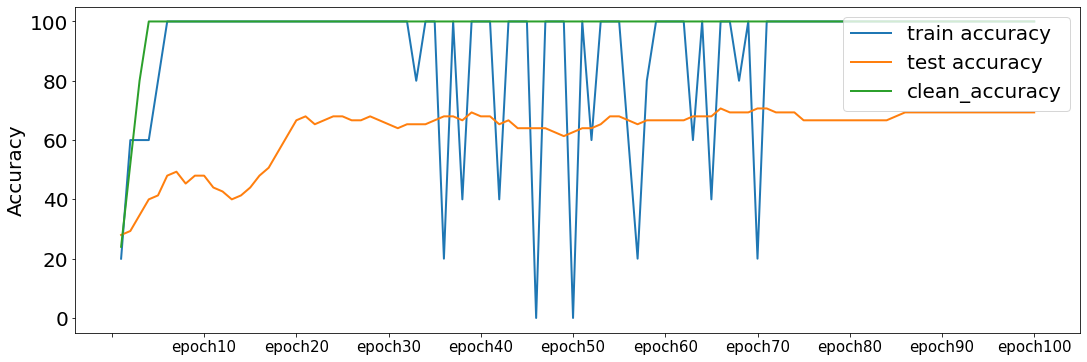

In [297]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/mini_test/05way_005shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_clean_history_cutmix_v1_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

Testing Accuracy of baseline 72.71 ± 0.87


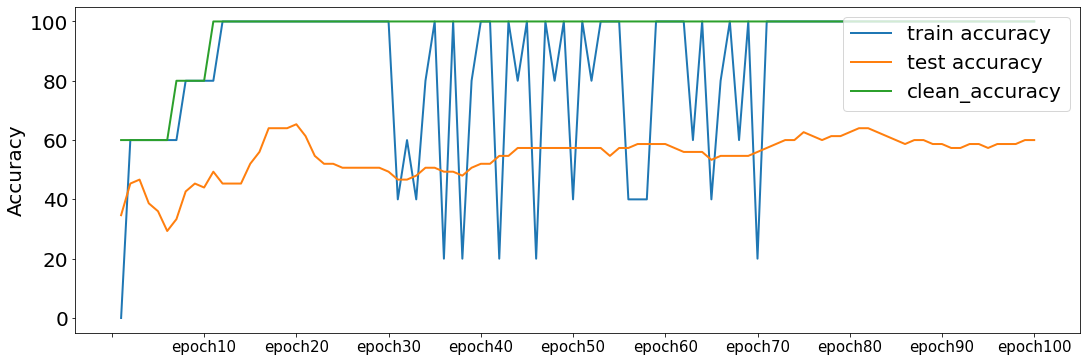

In [298]:
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/train_history_30_70.csv'.format(data), index_col='Unnamed: 0')
clean_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/test_history_30_70.csv'.format(data), index_col='Unnamed: 0')
train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/cutmix/clean_history_30_70.csv'.format(data), index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
plt.plot(clean_acc.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [299]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 118 epg: 0.0
0.7599999904632568
0.7599999904632568


Testing Accuracy of baseline 73.12 ± 0.88


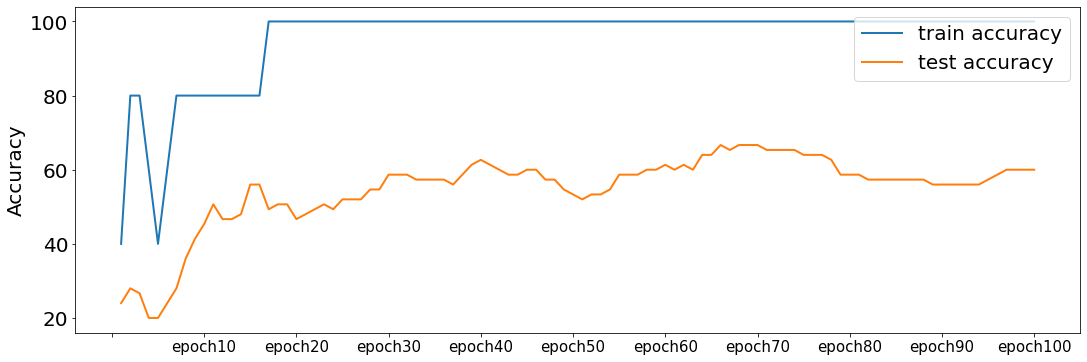

In [300]:
# middle
train_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/train_history.csv'.format(data), index_col='Unnamed: 0')
test_acc = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/{}/05way_001shot_head_default/test_history.csv'.format(data), index_col='Unnamed: 0')
#train_acc_clean = pd.read_csv('./logs/baseline/output/resnet10_simclr_LS_default/euro/05way_005shot_head_default/test_clean_history_cutmix_v1.csv', index_col='Unnamed: 0')
print ('Testing Accuracy of baseline {:.2f} ± {:.2f}'.format(test_acc.mean()[-1] * 100,
                                         1.96 * test_acc.std()[-1] / np.sqrt(600) * 100))
fig = plt.figure(figsize=(18,6))

plt.plot(train_acc.loc[episode]*100, label='train accuracy'.format(episode))
plt.plot(test_acc.loc[episode]*100, label='test accuracy'.format(episode))
#plt.plot(train_acc_clean.loc[episode]*100, label='clean_accuracy'.format(episode))
plt.xticks(np.arange(-1, 100, 10), fontsize = 15)
plt.yticks(fontsize = 20)
plt.ylabel("Accuracy", fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()
plt.close()

In [295]:
epg = test_acc.max(axis=1) - test_acc.iloc[:,-1]
max_idx = np.argmax(epg)
max_epg = epg[idx]
print("index:", max_idx, "epg:",max_epg*100)
print(test_acc.max(axis=1)[max_idx])
print(test_acc.iloc[:,-1][max_idx])

index: 30 epg: 6.666666269302368
0.3733333349227905
0.293333351612091
